# Algorithm Performance on the Wikipedia Game
## Collaborative Deep Dive
Arturo Joya, Kat Canavan, Joseph Gilbert

## Introduction

This notebook is written to visualize the performance of the Breadth First Search algorithm on our subset of Wikipedia articles.

In summary, we have scraped a portion of Wikipedia to generate a collection of edges for a directional graph that encompasses the connections from one Wikipedia article to another via embedded links. Here we are running a shortest path algorithm - Breadth First Search - that take in the edges of the graph, an origin vertex, and a destination vertex. For our performance test, we will be subjecting the shortest path algorithm to 10000 randomly chosen origins and destinations. We will be measuring how long it takes the algorithm to find the shortest path and comparing the performance based on path-length to runtime. This should allow us to gain a better understanding on how the algorithm behaves with our little subset.

We originally wanted to replicate results achieved with Six Degrees of Wikipedia; however due to time limitations 

In [71]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

#Import Database and Algs
from data_storage import dataPickle
import sorter as st

DATA_FILE = 'wiki_data.pickle'
db = dataPickle()

In [88]:
#a couple of random points
origin = "/wiki/Turning_Red"
destination = "/wiki/King_George_VI_and_Queen_Elizabeth_Memorial"

startTime = time.time()
deg1, output1 = st.bfs_fast_rev(db,origin,destination,max_depth=20)
#deg1 = len(output1)
execTime = (time.time()-startTime)
print(f'This Path is only {deg1} edges long with path {output1} which took {execTime} seconds')


origin = '/wiki/The_Battle_of_Dorking'
destination = '/wiki/Chernobyl_(novel)'

startTime2 = time.time()
deg1, output1 = st.bfs_fast_rev(db,origin,destination,max_depth=20)
if len(output1) == 0:
    deg1 = 0
#deg1 = len(output1)
execTime2 = (time.time()-startTime2)
print(f'This Path is only {deg1} edges long with path {output1} which took {execTime} seconds')

This Path is only 4 edges long with path {'/wiki/The_Cenotaph,_Whitehall': {'/wiki/King_George_VI_and_Queen_Elizabeth_Memorial'}, '/wiki/Manchester': {'/wiki/The_Cenotaph,_Whitehall'}, '/wiki/The_Guardian': {'/wiki/Manchester'}, '/wiki/Turning_Red': {'/wiki/The_Guardian'}} which took 0.003999233245849609 seconds
This Path is only 0 edges long with path {} which took 0.003999233245849609 seconds


It's a promising result, but this is only just a single example. Now we should test this with some different origins and destinations. We have already created a pickle file with 10000 randomly chosen origins and destinations that we will be feeding into the algorithm. Since this is a very computationally expensive task, we have pre-run the operation and have stored the values of interest (runtime and length of shortest path) in a csv that we can extract our data from and apply some statistics.

If you want to generate your own set of 10000 origins and destinations, modify the `get_lists.py` file and then run the `run_algorithm.py` file. To compile data, we used a max depth of 20 edges `max_depth = 20` to get as complete of a dataset as we found reasonable. Note that gathering this data of the origins and destinations took 4578.696 seconds, or roughly 76.3 minutes.

In [74]:
with open('wiki_stats_20k.pickle', 'rb') as handle:
    bds_degrees, bds_outputs, bds_runtimes = pickle.load(handle)

Now that we've loaded in our data, lets separate this data based on the path length, which we have called "degree" as in degree of separation. Thus, a path containing only 1 edge is said to have 1 degree of separation. Since we have a maximum depth of 20, we will need to create 20 lists containing the runtimes. In some cases, 20 degrees was not enough, so there were cases where we get to the max depth with no actual path. We thus have to consider this when separating our data, which we do below.

In [92]:
bds_runtime_none = []
bds_runtime_deg0_r = []
bds_runtime_deg1_r = []
bds_runtime_deg2_r = []
bds_runtime_deg3_r = []
bds_runtime_deg4_r = []
bds_runtime_deg5_r = []
bds_runtime_deg6_r = []
bds_runtime_deg7_r = []
bds_runtime_deg8_r = []
bds_runtime_deg9_r = []
bds_runtime_degX_r = []
bds_runtime_degX1_r = []
bds_runtime_degX2_r = []
bds_runtime_degX3_r = []
bds_runtime_degX4_r = []
bds_runtime_degX5_r = []
bds_runtime_degX6_r = []
bds_runtime_degX7_r = []
bds_runtime_degX8_r = []
bds_runtime_degX9_r = []
bds_runtime_deg2X_r = []

for i in range(len(bds_runtimes)):
    if bds_degrees[i] == 0:
        bds_runtime_deg0_r.append(bds_runtimes[i])
    if bds_degrees[i] == 1:
        bds_runtime_deg1_r.append(bds_runtimes[i])
    if bds_degrees[i] == 2:
        bds_runtime_deg2_r.append(bds_runtimes[i])
    if bds_degrees[i] == 3:
        bds_runtime_deg3_r.append(bds_runtimes[i])
    if bds_degrees[i] == 4:
        bds_runtime_deg4_r.append(bds_runtimes[i])
    if bds_degrees[i] == 5:
        bds_runtime_deg5_r.append(bds_runtimes[i])
    if bds_degrees[i] == 6:
        bds_runtime_deg6_r.append(bds_runtimes[i])
    if bds_degrees[i] == 7:
        bds_runtime_deg7_r.append(bds_runtimes[i])
    if bds_degrees[i] == 8:
        bds_runtime_deg8_r.append(bds_runtimes[i])
    if bds_degrees[i] == 9:
        bds_runtime_deg9_r.append(bds_runtimes[i])
    if bds_degrees[i] == 10:
        bds_runtime_degX_r.append(bds_runtimes[i])
    if bds_degrees[i] == 11:
        bds_runtime_degX1_r.append(bds_runtimes[i])
    if bds_degrees[i] == 12:
        bds_runtime_degX2_r.append(bds_runtimes[i])
    if bds_degrees[i] == 13:
        bds_runtime_degX3_r.append(bds_runtimes[i])
    if bds_degrees[i] == 14:
        bds_runtime_degX4_r.append(bds_runtimes[i])
    if bds_degrees[i] == 15:
        bds_runtime_degX5_r.append(bds_runtimes[i])
    if bds_degrees[i] == 16:
        bds_runtime_degX6_r.append(bds_runtimes[i])
    if bds_degrees[i] == 17:
        bds_runtime_degX7_r.append(bds_runtimes[i])
    if bds_degrees[i] == 18:
        bds_runtime_degX8_r.append(bds_runtimes[i])
    if bds_degrees[i] == 19:
        if len(bds_outputs[i]) == 0:
            bds_runtime_none.append(bds_runtimes[i])
        else:
            bds_runtime_degX9_r.append(bds_runtimes[i])
    #if bds_degrees[i] == 20:
    #    bds_runtime_deg2X_r.append(bds_runtimes[i]) 
    #if bds_degrees[i] == 1000000:
    #    bds_runtime_none.append(bds_runtimes[i]) 

Now that we have parsed our data out into these bins, we can run some statistics on our data to get a rough idea on the performance of the BDS algorithm. We will do this by getting the mean runtime for each bin, and the standard deviation of the run times.

In [93]:
bds_none_mean = np.mean(bds_runtime_none)
bds_deg0_mean_r = np.mean(bds_runtime_deg0_r)
bds_deg1_mean_r = np.mean(bds_runtime_deg1_r)
bds_deg2_mean_r = np.mean(bds_runtime_deg2_r)
bds_deg3_mean_r = np.mean(bds_runtime_deg3_r)
bds_deg4_mean_r = np.mean(bds_runtime_deg4_r)
bds_deg5_mean_r = np.mean(bds_runtime_deg5_r)
bds_deg6_mean_r = np.mean(bds_runtime_deg6_r)
bds_deg7_mean_r = np.mean(bds_runtime_deg7_r)
bds_deg8_mean_r = np.mean(bds_runtime_deg8_r)
bds_deg9_mean_r = np.mean(bds_runtime_deg9_r)
bds_degX_mean_r = np.mean(bds_runtime_degX_r)
bds_degX1_mean_r = np.mean(bds_runtime_degX1_r)
bds_degX2_mean_r = np.mean(bds_runtime_degX2_r)
bds_degX3_mean_r = np.mean(bds_runtime_degX3_r)
bds_degX4_mean_r = np.mean(bds_runtime_degX4_r)
bds_degX5_mean_r = np.mean(bds_runtime_degX5_r)
bds_degX6_mean_r = np.mean(bds_runtime_degX6_r)
bds_degX7_mean_r = np.mean(bds_runtime_degX7_r)
bds_degX8_mean_r = np.mean(bds_runtime_degX8_r)
#bds_degX9_mean_r = np.mean(bds_runtime_degX9_r)
#bds_deg2X_mean_r = np.mean(bds_runtime_deg2X_r)

bds_none_std = np.std(bds_runtime_none)
bds_deg0_std_r = np.std(bds_runtime_deg0_r)
bds_deg1_std_r = np.std(bds_runtime_deg1_r)
bds_deg2_std_r = np.std(bds_runtime_deg2_r)
bds_deg3_std_r = np.std(bds_runtime_deg3_r)
bds_deg4_std_r = np.std(bds_runtime_deg4_r)
bds_deg5_std_r = np.std(bds_runtime_deg5_r)
bds_deg6_std_r = np.std(bds_runtime_deg6_r)
bds_deg7_std_r = np.std(bds_runtime_deg7_r)
bds_deg8_std_r = np.std(bds_runtime_deg8_r)
bds_deg9_std_r = np.std(bds_runtime_deg9_r)
bds_degX_std_r = np.std(bds_runtime_degX_r)
bds_degX1_std_r = np.std(bds_runtime_degX1_r)
bds_degX2_std_r = np.std(bds_runtime_degX2_r)
bds_degX3_std_r = np.std(bds_runtime_degX3_r)
bds_degX4_std_r = np.std(bds_runtime_degX4_r)
bds_degX5_std_r = np.std(bds_runtime_degX5_r)
bds_degX6_std_r = np.std(bds_runtime_degX6_r)
bds_degX7_std_r = np.std(bds_runtime_degX7_r)
bds_degX8_std_r = np.std(bds_runtime_degX8_r)
#bds_degX9_std_r = np.std(bds_runtime_degX9_r)
#bds_deg2X_std_r = np.std(bds_runtime_deg2X_r)

Now that we have our mean and standard deviation for the means, we can visualize this information with errorbars to see how the means and standard deviations compare to each other.

<ErrorbarContainer object of 3 artists>

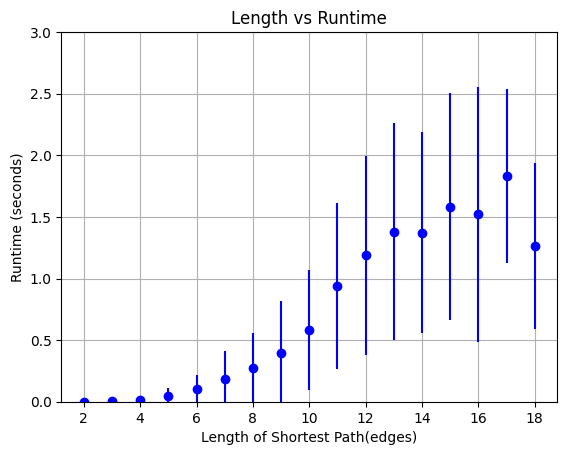

In [84]:
plt.figure()
plt.ylabel("Runtime (seconds)")
plt.xlabel("Length of Shortest Path(edges)")
plt.title("Length vs Runtime")
plt.grid(True)
plt.ylim(0,3)

plt.errorbar(0, bds_deg0_mean_r, yerr= bds_deg0_std_r, fmt='--o', color='blue')
plt.errorbar(1, bds_deg1_mean_r, yerr= bds_deg1_std_r, fmt='--o', color='blue')
plt.errorbar(2, bds_deg2_mean_r, yerr= bds_deg2_std_r, fmt='--o', color='blue')
plt.errorbar(3, bds_deg3_mean_r, yerr= bds_deg3_std_r, fmt='--o', color='blue')
plt.errorbar(4, bds_deg4_mean_r, yerr= bds_deg4_std_r, fmt='--o', color='blue')
plt.errorbar(5, bds_deg5_mean_r, yerr= bds_deg5_std_r ,fmt='--o', color='blue')
plt.errorbar(6, bds_deg6_mean_r, yerr= bds_deg6_std_r, fmt='--o', color='blue')
plt.errorbar(7, bds_deg7_mean_r, yerr= bds_deg7_std_r, fmt='--o', color='blue')
plt.errorbar(8, bds_deg8_mean_r, yerr= bds_deg8_std_r, fmt='--o', color='blue')
plt.errorbar(9, bds_deg9_mean_r, yerr= bds_deg9_std_r, fmt='--o', color='blue')
plt.errorbar(10, bds_degX_mean_r, yerr= bds_degX_std_r, fmt='--o', color='blue')
plt.errorbar(11, bds_degX1_mean_r, yerr= bds_degX1_std_r, fmt='--o', color='blue')
plt.errorbar(12, bds_degX2_mean_r, yerr= bds_degX2_std_r, fmt='--o', color='blue')
plt.errorbar(13, bds_degX3_mean_r, yerr= bds_degX3_std_r, fmt='--o', color='blue')
plt.errorbar(14, bds_degX4_mean_r, yerr= bds_degX4_std_r, fmt='--o', color='blue')
plt.errorbar(15, bds_degX5_mean_r, yerr= bds_degX5_std_r, fmt='--o', color='blue')
plt.errorbar(16, bds_degX6_mean_r, yerr= bds_degX6_std_r, fmt='--o', color='blue')
plt.errorbar(17, bds_degX7_mean_r, yerr= bds_degX7_std_r, fmt='--o', color='blue')
plt.errorbar(18, bds_degX8_mean_r, yerr= bds_degX8_std_r, fmt='--o', color='blue')
#plt.errorbar(19, bds_degX9_mean_r, yerr= bds_degX9_std_r, fmt='--o', color='blue')
#plt.errorbar(20, bds_deg2X_mean_r, yerr= bds_deg2X_std_r, fmt='--o', color='blue')
plt.errorbar(21, bds_none_mean, yerr= bds_none_std, fmt='--o', color='blue')


From the data that we have, we can see that the run time incresed exponentially as the depth of the path increased up until about 13th edge, where it seemed to flatten slightly. We can attribute this to the fact that there were simply less paths of the larger lengths, as we had a significantly smaller subset of the wikipedia pages.

To get a bit more detail we can plot the Path length Vs Runtime graph using a scatter plot to detect any outliers.

In [96]:
deg_0 = 0*np.ones(len(bds_runtime_deg0_r), dtype=np.int64)
deg_1 = 1*np.ones(len(bds_runtime_deg1_r), dtype=np.int64)
deg_2 = 2*np.ones(len(bds_runtime_deg2_r), dtype=np.int64)
deg_3 = 3*np.ones(len(bds_runtime_deg3_r), dtype=np.int64)
deg_4 = 4*np.ones(len(bds_runtime_deg4_r), dtype=np.int64)
deg_5 = 5*np.ones(len(bds_runtime_deg5_r), dtype=np.int64)
deg_6 = 6*np.ones(len(bds_runtime_deg6_r), dtype=np.int64)
deg_7 = 7*np.ones(len(bds_runtime_deg7_r), dtype=np.int64)
deg_8 = 8*np.ones(len(bds_runtime_deg8_r), dtype=np.int64)
deg_9 = 9*np.ones(len(bds_runtime_deg9_r), dtype=np.int64)
deg_X = 10*np.ones(len(bds_runtime_degX_r), dtype=np.int64)
deg_X1 = 11*np.ones(len(bds_runtime_degX1_r), dtype=np.int64)
deg_X2 = 12*np.ones(len(bds_runtime_degX2_r), dtype=np.int64)
deg_X3 = 13*np.ones(len(bds_runtime_degX3_r), dtype=np.int64)
deg_X4 = 14*np.ones(len(bds_runtime_degX4_r), dtype=np.int64)
deg_X5 = 15*np.ones(len(bds_runtime_degX5_r), dtype=np.int64)
deg_X6 = 16*np.ones(len(bds_runtime_degX6_r), dtype=np.int64)
deg_X7 = 17*np.ones(len(bds_runtime_degX7_r), dtype=np.int64)
deg_X8 = 18*np.ones(len(bds_runtime_degX8_r), dtype=np.int64)
#deg_X9 = 19*np.ones(len(bds_runtime_degX9_r), dtype=np.int64)
#deg_2X = 20*np.ones(len(bds_runtime_deg2X_r), dtype=np.int64)
deg_na = 21*np.ones(len(bds_runtime_none), dtype=np.int64)

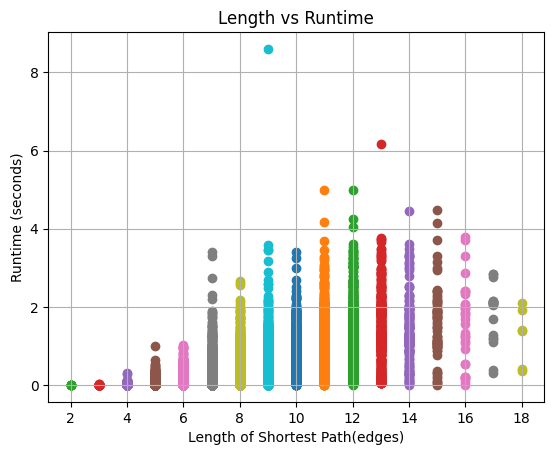

In [99]:
plt.figure() 
plt.ylabel("Runtime (seconds)")
plt.xlabel("Length of Shortest Path(edges)")
plt.title("Length vs Runtime")
plt.grid(True)
#plt.ylim(0,10)

plt.scatter(deg_0, bds_runtime_deg0_r)
plt.scatter(deg_1, bds_runtime_deg1_r)
plt.scatter(deg_2, bds_runtime_deg2_r)
plt.scatter(deg_3, bds_runtime_deg3_r)
plt.scatter(deg_4, bds_runtime_deg4_r)
plt.scatter(deg_5, bds_runtime_deg5_r)
plt.scatter(deg_6, bds_runtime_deg6_r)
plt.scatter(deg_7, bds_runtime_deg7_r)
plt.scatter(deg_8, bds_runtime_deg8_r)
plt.scatter(deg_9, bds_runtime_deg9_r)
plt.scatter(deg_X, bds_runtime_degX_r)
plt.scatter(deg_X1, bds_runtime_degX1_r)
plt.scatter(deg_X2, bds_runtime_degX2_r)
plt.scatter(deg_X3, bds_runtime_degX3_r)
plt.scatter(deg_X4, bds_runtime_degX4_r)
plt.scatter(deg_X5, bds_runtime_degX5_r)
plt.scatter(deg_X6, bds_runtime_degX6_r)
plt.scatter(deg_X7, bds_runtime_degX7_r)
plt.scatter(deg_X8, bds_runtime_degX8_r)
#plt.scatter(deg_X9, bds_runtime_degX9_r)
#plt.scatter(deg_2X, bds_runtime_deg2X_r)
plt.scatter(deg_na, bds_runtime_none)

plt.show()

It may also be valuable to see how many of these paths did we find. What was the mode path length?

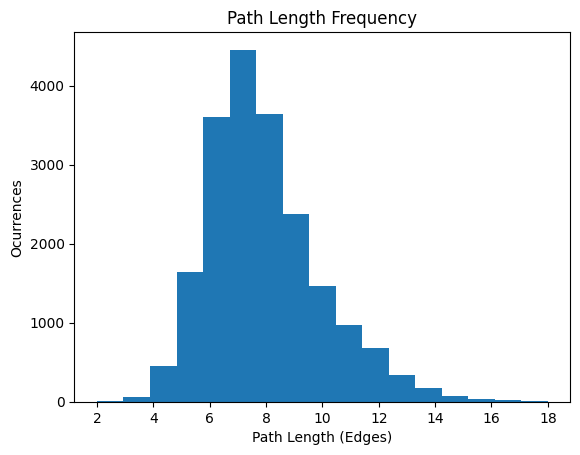

In [113]:
path_lengths = np.concatenate((deg_2, deg_3, deg_4, deg_5, deg_6, deg_7, deg_8, deg_9, deg_X, deg_X1, 
                              deg_X2, deg_X3, deg_X4, deg_X5, deg_X6, deg_X7, deg_X8))
plt.figure()
plt.hist(path_lengths, bins = 17)
plt.title("Path Length Frequency")
plt.xlabel("Path Length (Edges)")
plt.ylabel("Ocurrences")
plt.show()

From what we can see here, with the current data set we found mostly paths of length 7. This is not bad at all in our opinion, and we would expect this mode to shift to the left as more data became available.